## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
# importing packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE, RFECV

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data frame
df = pd.read_csv("cleaned_ecommerce_dataset.csv")
df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [3]:
# length of data frame
len(df)

2685

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [4]:
# head
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [13]:
# null check
df.isnull().sum()

userId           0
timestamp        0
review           0
item             0
rating           0
helpfulness      0
gender           0
category         0
item_id          0
item_price       0
user_city        0
category_code    0
gender_code      0
review_code      0
dtype: int64

In [14]:
# convert categorical values into numerial values
ord_enc=OrdinalEncoder(dtype=int)

df["category_code"] = ord_enc.fit_transform(df[["category"]])
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df["review_code"] = ord_enc.fit_transform(df[["review"]])                                                                           
                                                                            
df[["category", "category_code", "review", "review_code", "gender", "gender_code"]].head(11)

,category,category_code,review,review_code,gender,gender_code
0,Restaurants & Gourmet,8,Not always McCrap,1618,M,1
1,Restaurants & Gourmet,8,I dropped the chalupa even before he told me to,1125,M,1
2,Restaurants & Gourmet,8,The Wonderful World of Wendy,2185,M,1
3,Movies,5,They actually did it,2243,M,1
4,Movies,5,Hey! Gimme some pie!,1033,M,1
5,Movies,5,Good for sci-fi,925,M,1
6,Movies,5,Scary? you bet!,1854,M,1
7,Media,4,Fox - the 4th basic channel,795,M,1
8,Movies,5,Amen!,262,M,1
9,Restaurants & Gourmet,8,mama mia!,2643,M,1


In [7]:
# dataframe head after conversion
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city,category_code,gender_code,review_code
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4,8,1,1618
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4,8,1,1125
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4,8,1,2185
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4,5,1,2243
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4,5,1,1033


In [8]:
# correlations between helpfulness/category/gender/review and rating
corr_helpfulness = df['helpfulness'].corr(df['rating']) 
corr_category = df['category_code'].corr(df['rating'])
corr_gender = df['gender_code'].corr(df['rating'])
corr_review = df['review_code'].corr(df['rating'])

print('corr_helpfulness: ', corr_helpfulness)
print('corr_category: ', corr_category)
print('corr_gender: ', corr_gender)
print('corr_review: ', corr_review)

corr_helpfulness:  -0.007523337726844546
corr_category:  -0.16315765340915656
corr_gender:  -0.03433661424208265
corr_review:  -0.036118386552122385


Based on the results, it can be concluded that:
* Rating and item category have the strongest negative correlation.
* On the other hand, the correlation between rating and helpfulness is the weakest. 
* In conclusion, since the resulted correlation values are low, rating is not significantly connected with the four attributes (helpfulness, category, gender, and review). 
* Therefore, the use of these features as input for rating prediction may not be totally accurate.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [9]:
# Case 1 - training data containing 10% of the entire data
train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=142)
print('Case 1 train shape: ', train_case1.shape)
print('Case 1 test shape: ', test_case1.shape)

# Case 2 - training data containing 90% of the entire data
train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=142)
print('Case 2 train shape: ', train_case2.shape)
print('Case 2 test shape: ', test_case2.shape)

Case 1 train shape:  (268, 14)
Case 1 test shape:  (2417, 14)
Case 2 train shape:  (2416, 14)
Case 2 test shape:  (269, 14)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [10]:
# Model A - using the training/testing data in case 1 with two most correlated input features
reg_M1 = linear_model.LinearRegression()
X_train_M1 = train_case1[['review_code', 'category_code']]
y_train_M1 = train_case1['rating']

X_test_M1 = test_case1[['review_code', 'category_code']]
y_test_M1 = test_case1['rating']

reg_M1.fit(X_train_M1, y_train_M1)

# Model B - using the training/testing data in case 1 with two least correlated input features
reg_L1 = linear_model.LinearRegression()
X_train_L1 = train_case1[['gender_code', 'helpfulness']]
y_train_L1 = train_case1['rating']

X_test_L1 = test_case1[['gender_code', 'helpfulness']]
y_test_L1 = test_case1['rating']

reg_L1.fit(X_train_L1, y_train_L1)

# Model C - using the training/testing data in case 2 with two most correlated input features
reg_M2 = linear_model.LinearRegression()
X_train_M2 = train_case2[['review_code', 'category_code']]
y_train_M2 = train_case2['rating']

X_test_M2 = test_case2[['review_code', 'category_code']]
y_test_M2 = test_case2['rating']

reg_M2.fit(X_train_M2, y_train_M2)

# Model D - using the training/testing data in case 2 with two least correlated input features
reg_L2 = linear_model.LinearRegression()
X_train_L2 = train_case2[['gender_code', 'helpfulness']]
y_train_L2 = train_case2['rating']

X_test_L2 = test_case2[['gender_code', 'helpfulness']]
y_test_L2 = test_case2['rating']

reg_L2.fit(X_train_L2, y_train_L2)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [11]:
# Evaluate reg_M1
predicted_M1 = reg_M1.predict(X_test_M1)
mse_M1 = ((np.array(y_test_M1)-predicted_M1)**2).sum()/len(y_test_M1)
rmse_M1 = np.sqrt(mse_M1)
print("Case 1 - The results for the model A the most correlated features")
print("reg_M1 MSE:", mse_M1)
print("reg_M1 Root MSE:", rmse_M1)
print("")

# Evaluate reg_L1
predicted_L1 = reg_L1.predict(X_test_L1)
mse_L1 = ((np.array(y_test_L1)-predicted_L1)**2).sum()/len(y_test_L1)
rmse_L1 = np.sqrt(mse_L1)
print("Case 1 - The results for the model B the least correlated features")
print("reg_L1 MSE:", mse_L1)
print("reg_L1 Root MSE:", rmse_L1)
print("")

# Evaluate reg_M2
predicted_M2 = reg_M2.predict(X_test_M2)
mse_M2 = ((np.array(y_test_M2)-predicted_M2)**2).sum()/len(y_test_M2)
rmse_M2 = np.sqrt(mse_M2)
print("Case 2 - The results for the model C the most correlated features")
print("reg_M2 MSE:", mse_M2)
print("reg_M2 Root MSE:", rmse_M2)
print("")

# Evaluate reg_L2
predicted_L2 = reg_L2.predict(X_test_L2)
mse_L2 = ((np.array(y_test_L2)-predicted_L2)**2).sum()/len(y_test_L2)
rmse_L2 = np.sqrt(mse_L2)
print("Case 2 - The results for the model D the least correlated features")
print("reg_L2 MSE:", mse_L2)
print("reg_L2 Root MSE:", rmse_L2)

Case 1 - The results for the model A the most correlated features
reg_M1 MSE: 1.7690740179517055
reg_M1 Root MSE: 1.3300654186737229

Case 1 - The results for the model B the least correlated features
reg_L1 MSE: 1.8412549895856636
reg_L1 Root MSE: 1.356928513071217

Case 2 - The results for the model C the most correlated features
reg_M2 MSE: 1.7588975359805048
reg_M2 Root MSE: 1.3262343442923294

Case 2 - The results for the model D the least correlated features
reg_L2 MSE: 1.8109460127732366
reg_L2 Root MSE: 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

<BarContainer object of 4 artists>

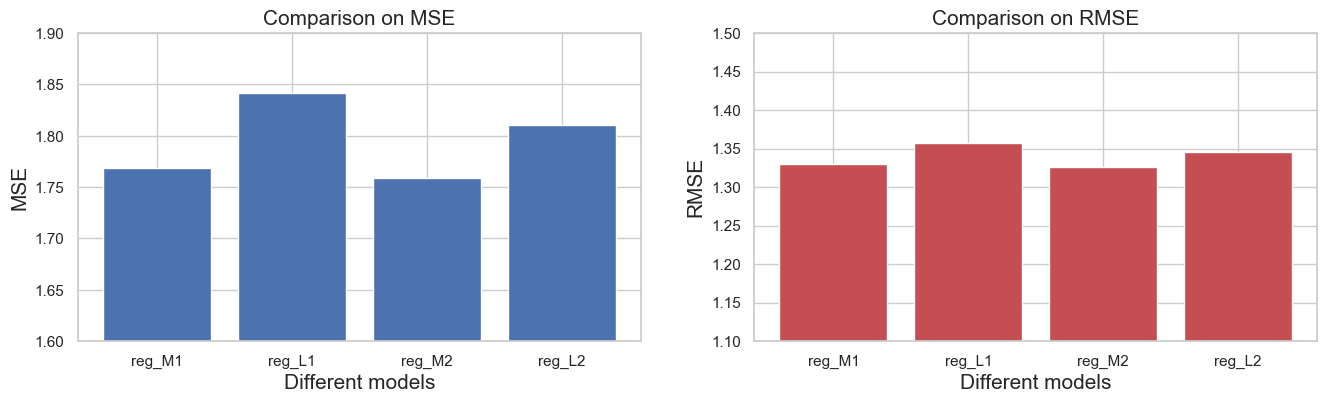

In [12]:
# dataframe for the mse values and rmse values
mse_df = pd.DataFrame({'mse': [mse_M1, mse_L1, mse_M2, mse_L2]}, index=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'])
rmse_df = pd.DataFrame({'rmse': [rmse_M1, rmse_L1, rmse_M2, rmse_L2]}, index=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'])

# plot figures to show the mse and rmse results of different cases
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.ylim(1.6,1.9)
plt.xlabel('Different models', size=15)
plt.ylabel('MSE', size=15)
plt.title("Comparison on MSE", size=15)
plt.bar(data=mse_df, height='mse', x=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'], color='b')
plt.subplot(1, 2, 2)
plt.ylim(1.1,1.5)
plt.xlabel('Different models', size=15)
plt.ylabel('RMSE', size=15)
plt.title("Comparison on RMSE", size=15)
plt.bar(data=rmse_df, height='rmse', x=['reg_M1', 'reg_L1', 'reg_M2','reg_L2'], color='r')

Based on the results, it can be concluded that:
## MSE
* reg_M2 < reg_M1 and reg_L2 < reg_L1 indicates that more training data will resulting better prediction
* reg_M1 < reg_L1 and reg_M2 < reg_L2 indicates that more correlated input features will generate better output

## RMSE
* reg_M2 < reg_M1 and reg_L2 < reg_L1 indicates that more training data will resulting better prediction
* reg_M1 < reg_L1 and reg_M2 < reg_L2 indicates that more correlated input features will generate better output

## Conclusion
* In conclusion, the little variations in performance with various settings show that the models are not well trained using these input features, according to the research. 
* Moreover, these input features are not very useful for rating prediction.